In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

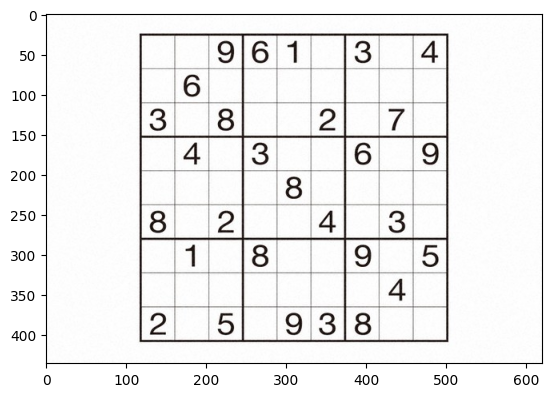

In [2]:
# read sample image
img = cv2.imread("../datasets/line-detection-sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # open cv image is BGR

plt.imshow(img)

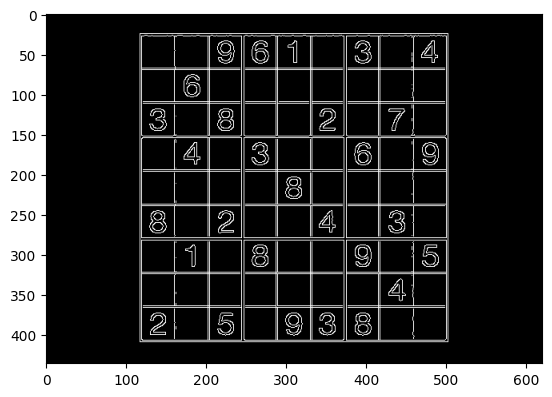

In [4]:
# preprocess for line detection
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
lower = np.mean(img) * 0.66
upper = np.mean(img) * 1.33 
edge = cv2.Canny(gray, lower, upper)

plt.imshow(edge, cmap="gray")


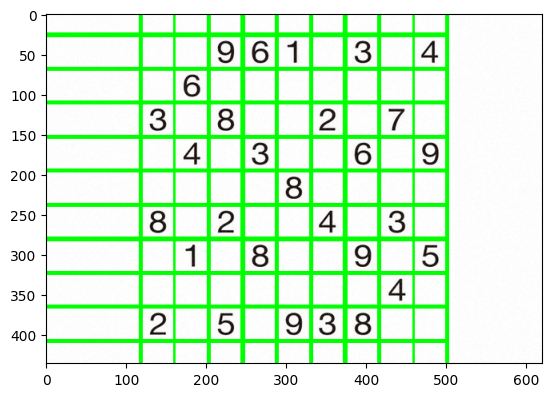

In [26]:
lines = cv2.HoughLines(edge, 1, np.pi/180, 180)
copy = img.copy()
line_length = 500

for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + line_length*(-b))
        y1 = int(y0 + line_length*(a))
        x2 = int(x0 - line_length*(-b))
        y2 = int(y0 - line_length*(a))
        
        cv2.line(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
plt.imshow(copy)

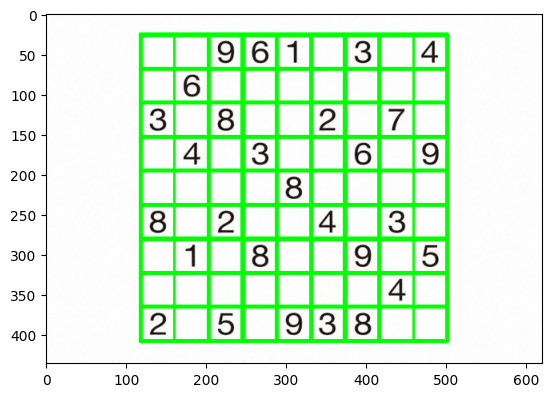

In [24]:
lines = cv2.HoughLinesP(edge, 1, np.pi/180, 180, minLineLength=10, maxLineGap=10)
copy = img.copy()
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
plt.imshow(copy)

We can observed that the HoughLinesP give us betters result. Since the HoughLinesP is based on the probability.